In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.shape

(731, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## EDA and Data Cleaning

<AxesSubplot:>

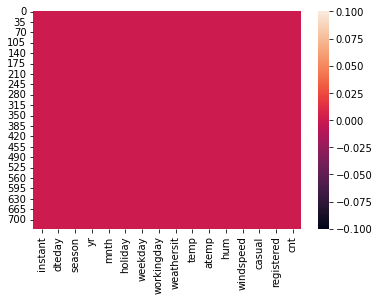

In [7]:
sns.heatmap(data.isnull())

 there are no missing valus in data

<AxesSubplot:>

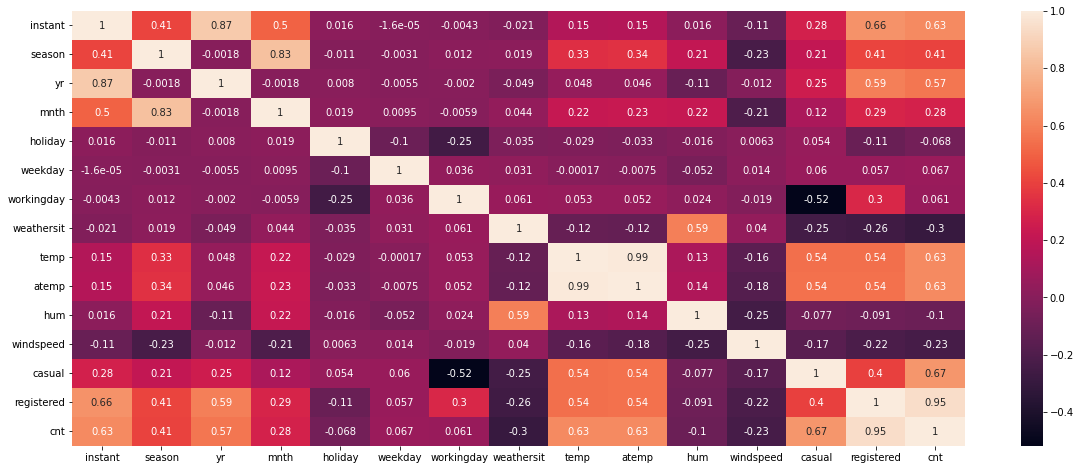

In [8]:
correlation = data.corr()
plt , ax1 = plt.subplots(figsize=(20 ,8))
sns.heatmap(correlation, annot=True)

In [9]:
data.drop(labels=["instant","casual", "registered", "dteday"], inplace=True , axis=1)

In [10]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [11]:
data.sample(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
224,3,0,8,0,6,0,2,0.685833,0.645858,0.729583,0.211454,4150
568,3,1,7,0,0,0,2,0.667500,0.623125,0.762500,0.093921,7410
43,1,0,2,0,0,0,1,0.316522,0.324113,0.457391,0.260883,1589
147,2,0,5,0,6,0,1,0.655833,0.612379,0.729583,0.230092,4758
174,3,0,6,0,5,1,1,0.724167,0.656583,0.573333,0.222025,4991
193,3,0,7,0,3,1,1,0.746667,0.689404,0.631667,0.146133,4342
123,2,0,5,0,3,1,2,0.414167,0.404650,0.737083,0.328996,2633
552,3,1,7,0,5,1,1,0.828333,0.752533,0.450833,0.146142,6207
127,2,0,5,0,0,0,1,0.528333,0.518933,0.631667,0.074637,4333
281,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,5511


In [12]:
data["season"].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

<AxesSubplot:>

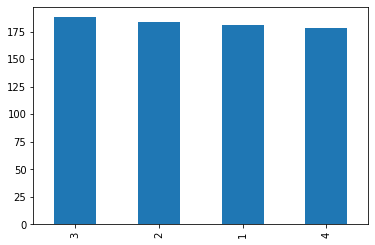

In [13]:
data["season"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='season', ylabel='cnt'>

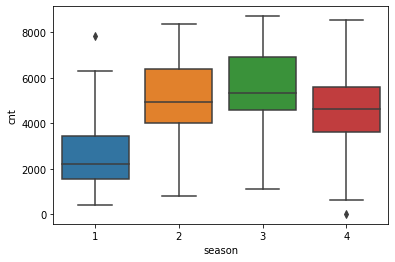

In [14]:
sns.boxplot(x="season", data=data , y="cnt")

season : season (spring - 1, summer - 2, fall - 3, winter - 4)

from the above obeservation we can see that 

fall season has the highest count 
and spring has the lowest count

In [15]:
data["yr"].value_counts()

1    366
0    365
Name: yr, dtype: int64

<AxesSubplot:xlabel='yr', ylabel='cnt'>

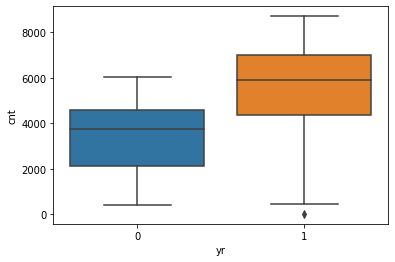

In [16]:
sns.boxplot(x="yr", y="cnt", data=data)

In [17]:
data["mnth"].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

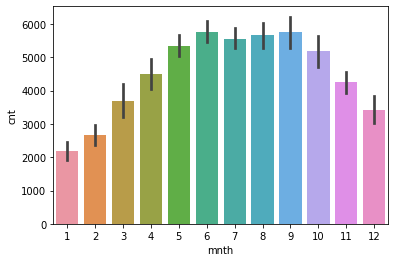

In [18]:
sns.barplot(x="mnth", y="cnt", data=data)

1:Jan ,2:Feb ,3:Mar ,4:Apr ,5:May ,6:Jun , 7:Jul , 8:Aug ,9: Sep ,10: Oct ,11: Nov ,12: Dec 

from the above observation we can clearly see that 
May, June, July , August , Sept and Oct have the hightest no. of bookings

<AxesSubplot:xlabel='mnth', ylabel='count'>

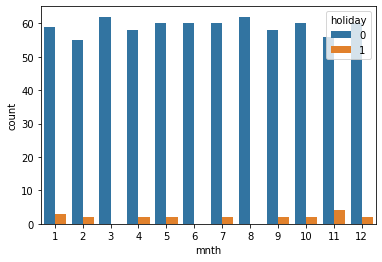

In [19]:
sns.countplot(x="mnth", hue="holiday", data=data)

from the observation we can see that

In november holidays are more has compare to other months
but in march , june , aug have no holidays

<AxesSubplot:xlabel='yr', ylabel='count'>

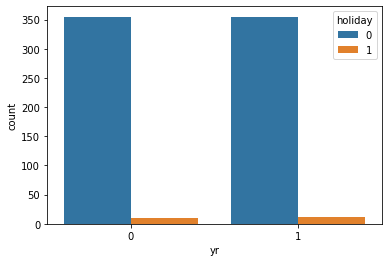

In [20]:
sns.countplot(x="yr", hue="holiday", data=data)

<AxesSubplot:xlabel='season', ylabel='count'>

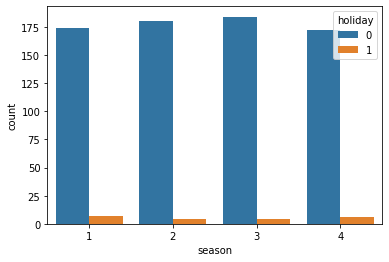

In [21]:
sns.countplot(x="season", hue="holiday", data=data)

In spring and winter season have many holidays has compare to summer and fall

In [22]:
x = data.drop("cnt", axis=1)
y = data["cnt"]

In [23]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [24]:
len(x_train)

511

In [25]:
len(x_test)

220

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train , y_train)

LinearRegression()

In [28]:
lr.score(x_test , y_test)

0.8108909842015212

In [29]:
train_score = lr.score(x_train , y_train)
test_score = lr.score(x_test , y_test)

In [30]:
print("train accuracy", round(train_score*100, 2), "%")

train accuracy 79.16 %


In [31]:
print("test accuracy", round(test_score*100,2), "%")

test accuracy 81.09 %


In [32]:
lr_pred = lr.predict(x_test)

In [33]:
lr_pred

array([5093.27095789, 5410.21453557, 1743.15192362, 1304.77394938,
       4168.09900464, 2993.99296456, 3579.01766002, 6104.52590452,
       5547.73030782, 1351.64441432, 1481.6214793 , 1248.56599765,
       1539.92148543, 4609.15403974, 5409.55001756, 3617.79789336,
       6167.98738237, 6253.12492402, 3605.51095728, 2244.60397159,
       7418.7052692 , 3145.6752527 , 5205.14592156, 4260.48157299,
       2422.68156297, 6135.92947381, 6335.13113344, 5131.97051062,
       6408.24020986, 6203.7425485 ,  695.3880133 , 4939.58290316,
       5365.19421266, 5278.53861093, 2019.94313054, 4413.0921142 ,
       7259.07837789, 8231.22377647, 2777.49441683, 3172.6815667 ,
       5727.56120277, 1541.69015024, 5043.9289746 , 4072.14007306,
       7137.10010992, 6647.44831929, 3211.47987305, 3512.04229435,
       3593.67852825, 1784.1947589 , 6037.73664318, 7171.56156395,
       4924.51756433, 5893.78526623, 4478.34121204, 3801.05257345,
       3166.15399112, 6318.41574095, 7111.44283354, 4337.31194

## plotting the grapgh

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

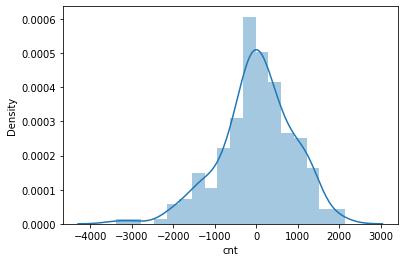

In [34]:
sns.distplot(y_test - lr_pred)

In [35]:
dc = DecisionTreeRegressor()

In [36]:
dc.fit(x_train , y_train)

DecisionTreeRegressor()

In [37]:
dc.score(x_test, y_test)

0.7717495080554158

In [38]:
dc_train_score = dc.score(x_train , y_train)
dc_test_score = dc.score(x_test , y_test)

In [39]:
print("training accuracy",round(dc_train_score*100, 2),"%" )

training accuracy 100.0 %


In [40]:
print("test accuracy",round(dc_test_score*100, 2),"%" )

test accuracy 77.17 %


In [41]:
dc_pred = dc.predict(x_test)

In [42]:
dc_pred

array([4484., 4665., 1204., 1969., 3005., 2594., 3894., 3786., 6235.,
        431., 1472., 2999., 2121., 4677., 4665., 3767., 6869., 6852.,
       3243., 2475., 7765., 5375., 5501., 4788.,  920., 6544., 3846.,
       4182., 6889., 7460.,  959., 4687., 7570., 5119., 2999., 3598.,
       6830., 5463., 1913., 3520., 6969.,  985., 4826., 3761., 7347.,
       6824., 3214., 3820.,  920., 2028., 5743., 5713., 6273., 7424.,
       4150., 3520., 3322., 7109., 6685., 3956., 6969., 4169., 4359.,
       8555., 7384., 2395., 4608., 4990., 6969., 5478., 6978., 7446.,
       1096., 7216., 3204., 7534., 6312., 6917., 3331., 2114., 3285.,
       5501., 4968., 1589., 2395., 7736., 4905., 5424., 4127., 4492.,
        431., 2077., 6830., 7112., 4972., 3831.,  705., 7286., 4708.,
       3956., 2395., 6235., 4585., 7538., 3141., 3285., 7767., 8009.,
       6304., 2999., 5312., 4150., 3907., 2077., 2298., 3958., 4687.,
       3873., 7444., 5558., 1623., 4629., 3429., 2935., 3894., 3907.,
        506., 5740.,

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

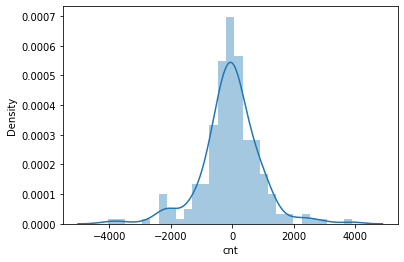

In [43]:
sns.distplot(y_test - dc_pred)

In [44]:
rf = RandomForestRegressor()

In [45]:
rf.fit(x_train , y_train)

RandomForestRegressor()

In [46]:
rf.score(x_test, y_test)

0.8902851418806766

In [47]:
rf_train_score = rf.score(x_train , y_train)
rf_test_score = rf.score(x_test , y_test)

In [48]:
print("Traing accuracy", round(rf_train_score*100,2), "%")
print("test score", round(rf_test_score*100, 2),"%")

Traing accuracy 98.1 %
test score 89.03 %


In [49]:
rf_y_pred = rf.predict(x_test)

In [50]:
rf_y_pred

array([5090.84, 4616.7 , 1544.36, 1423.94, 3405.63, 2962.55, 4036.39,
       5887.02, 6258.17,  861.15, 1572.84, 2369.74, 1871.89, 4797.12,
       4706.37, 4475.06, 7365.79, 6061.86, 3576.55, 2191.08, 7500.47,
       2008.96, 5195.34, 4786.84, 1924.01, 6874.32, 3861.67, 5137.3 ,
       7341.95, 7360.85, 1061.75, 4824.93, 5633.78, 5165.02, 2517.32,
       3864.28, 6292.65, 5566.62, 2358.78, 3459.49, 6843.47, 1526.02,
       4629.77, 4072.81, 7162.68, 7068.95, 2962.97, 4227.75, 2454.36,
       2054.51, 6396.41, 6705.12, 5417.94, 6864.51, 4423.63, 4045.18,
       3456.31, 6573.37, 6555.53, 3293.06, 7061.94, 4148.37, 4835.46,
       8202.97, 7114.38, 3197.96, 4559.91, 6234.84, 6604.51, 4852.49,
       6305.7 , 7024.71, 4227.82, 6716.01, 4184.57, 6718.47, 6176.22,
       6916.51, 3045.27, 2507.27, 4378.11, 5279.66, 5040.4 , 1822.53,
       4507.93, 7174.39, 5087.48, 5964.13, 4822.45, 4144.83,  810.47,
       2227.62, 6313.85, 6746.69, 5082.19, 3443.76, 2155.23, 7171.31,
       4632.03, 3308

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

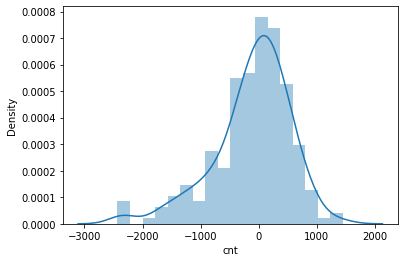

In [51]:
sns.distplot(y_test -rf_y_pred)